# Data Mining Project: Weather prediction

# Réalisés par:
## Cisse Mariame
## Cisse Pape Waly

In [45]:
import warnings
warnings.filterwarnings('ignore')

In [46]:
#import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
weather_data = pd.read_csv('weatherAUS.csv')
weather_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [48]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

# valeurs Manquantes

<Axes: >

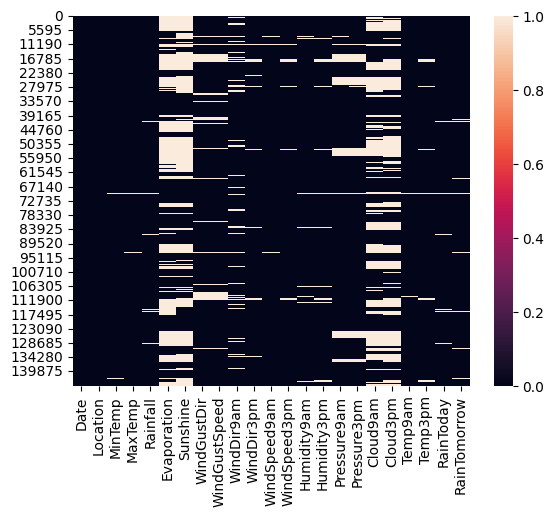

In [49]:
## voir comment les valeurs sont reparties dans notre dataset
sns.heatmap(weather_data.isnull())

 on peut voir ici que notre dataset contient beaucoup de valeurs manquantes . on va gérer ce probléme dans la suite aprés l'analyse

In [50]:
## sum permet de compter le nombre de valeur true pour chaque columns
weather_data.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

# Recherche de doublons

In [51]:
weather_data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
145455    False
145456    False
145457    False
145458    False
145459    False
Length: 145460, dtype: bool

In [52]:
## Pas de valeur duplicate
weather_data[weather_data.duplicated()]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow


Ainsi on peut voir que notre dataset n'a pas de doublons.

In [53]:
weather_data.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

### on repartit nos données en deux groupes : numérique et catégorique

In [54]:
categorical_col_with_target=list(weather_data.select_dtypes('object').columns)
numerical_col=list(weather_data.select_dtypes('float64').columns)
print(f"categorical_col={categorical_col_with_target}\n numerical_col= {numerical_col}")

categorical_col=['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
 numerical_col= ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [55]:
categorical_col = [i for i in categorical_col_with_target if i != "RainTomorrow" and i!="Date"]
categorical_col

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

##### On supprime toutes les valeurs manquantes figurant dans notre colonne target:RainTommorow

<Axes: >

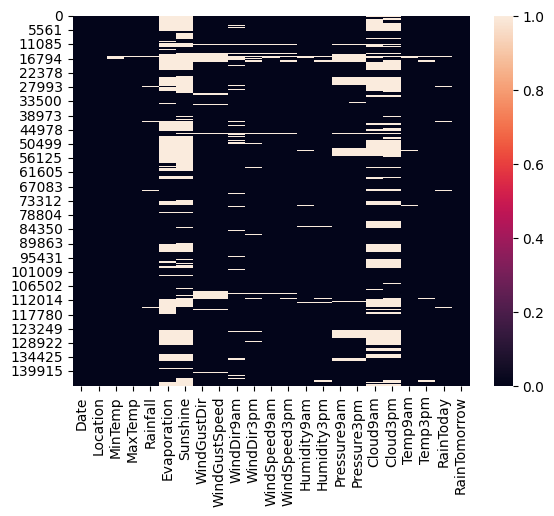

In [56]:
### Supprimer les valeurs manquantes:
weather_data.dropna(subset="RainTomorrow", inplace= True)
sns.heatmap(weather_data.isnull())

# Analyse des données


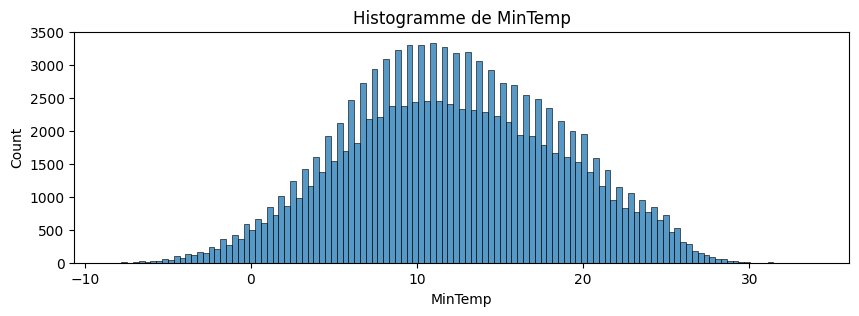

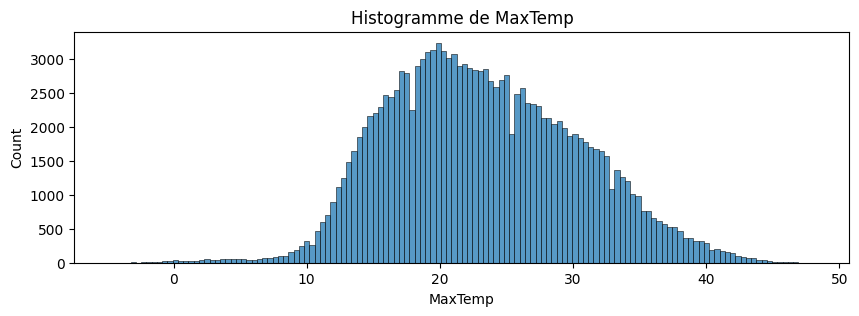

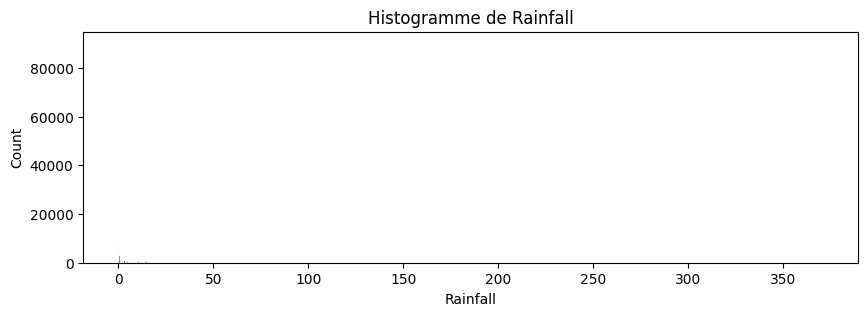

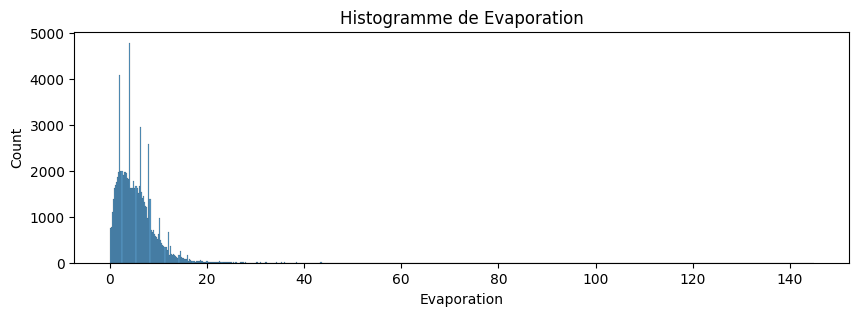

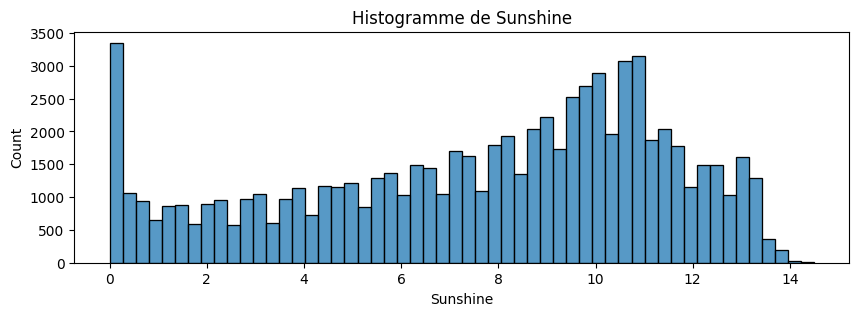

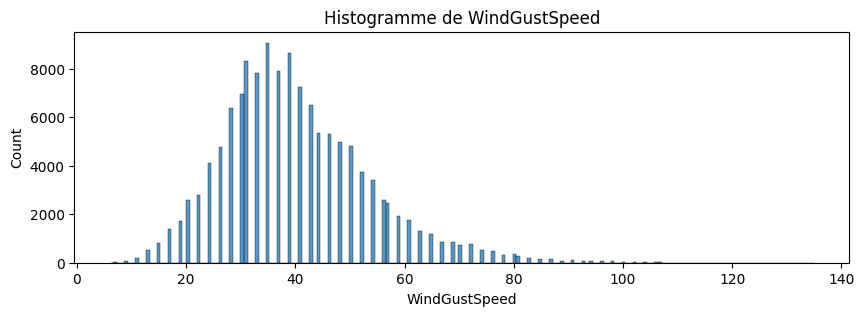

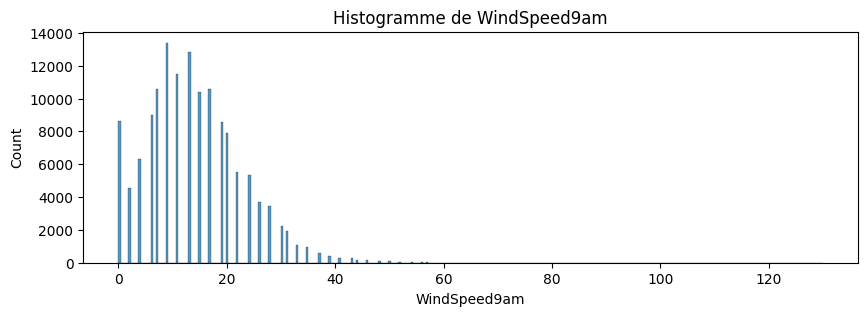

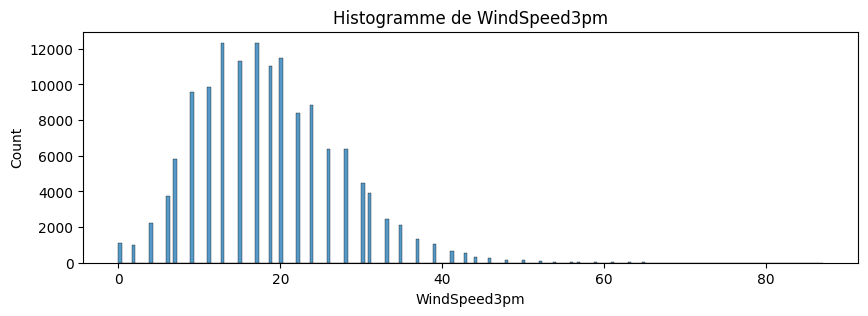

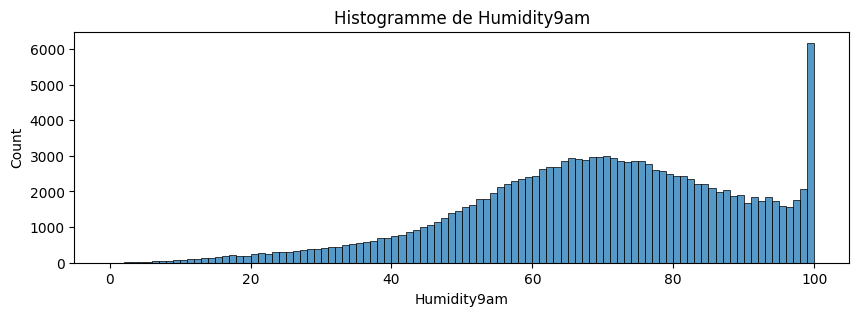

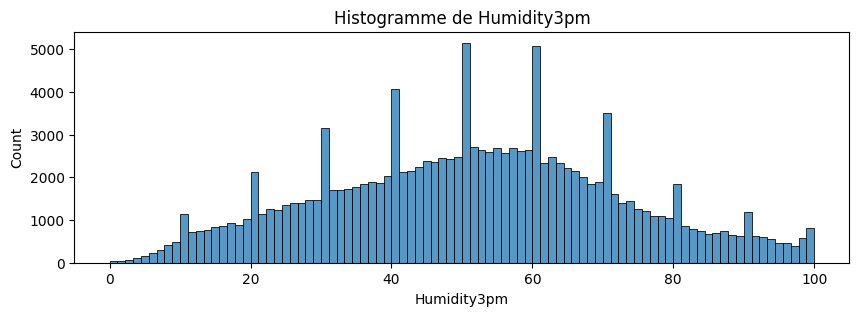

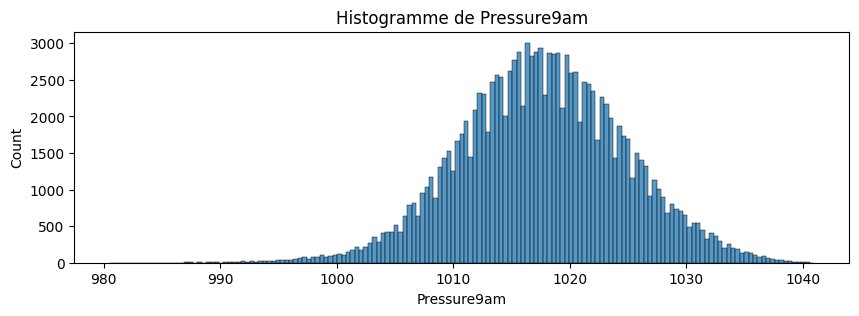

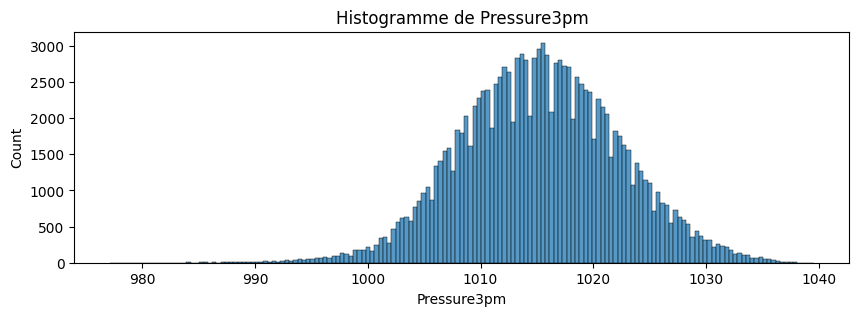

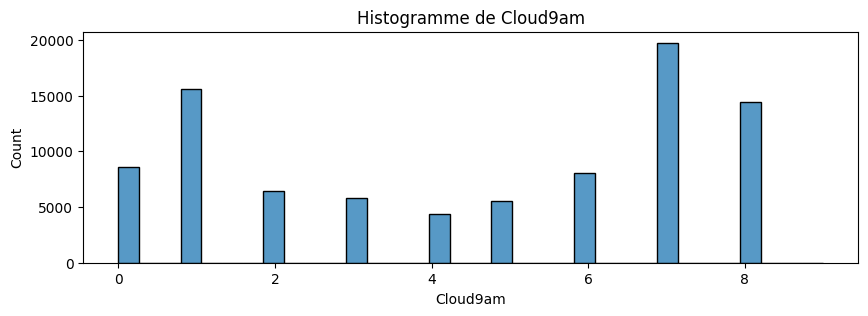

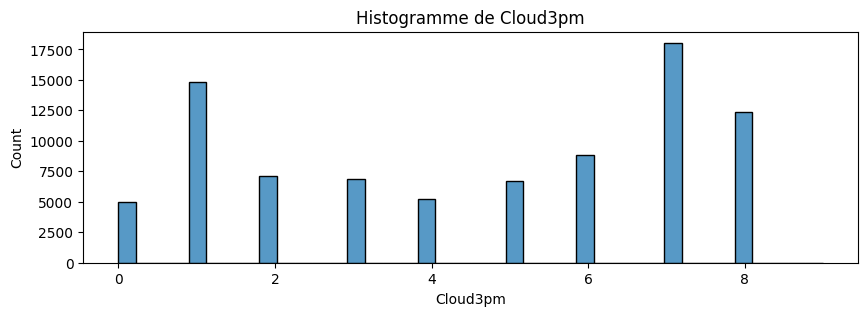

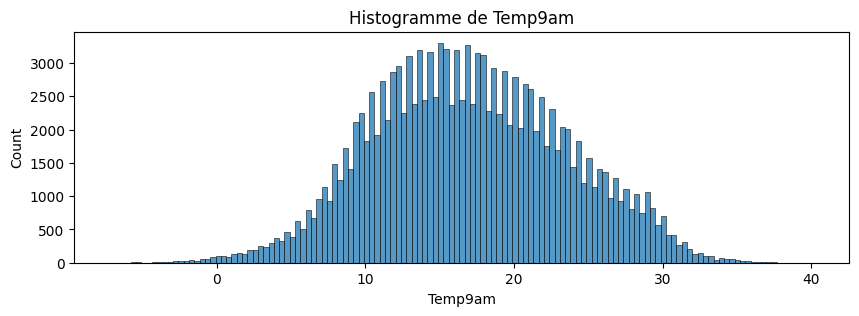

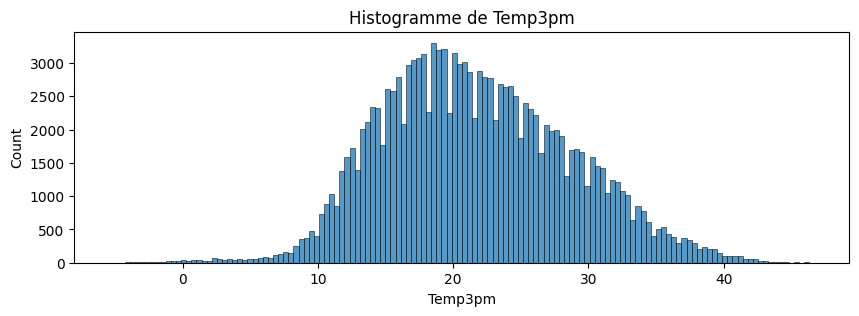

In [57]:
## Tracer les histogramme pour voir la repartissons des données:
for val in numerical_col:
    plt.figure(figsize=(10,3))
    sns.histplot(data=weather_data, x=val)
    plt.title(f"Histogramme de {val}")



### par ces graphes on comprend que tous nos données sont bien distribuées: certains aves des distribution normal et d'autre uniforme

# Analyse en fonction de RainTommorow

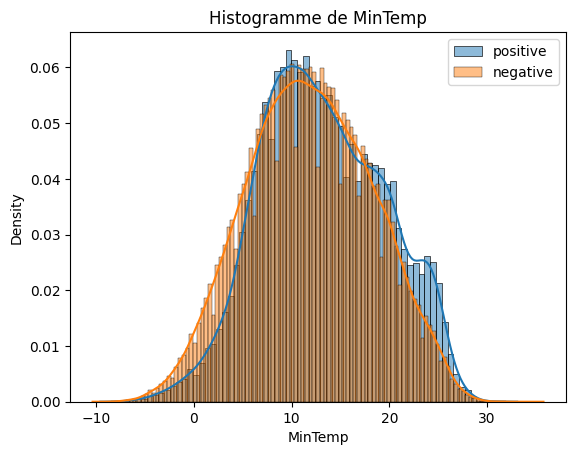

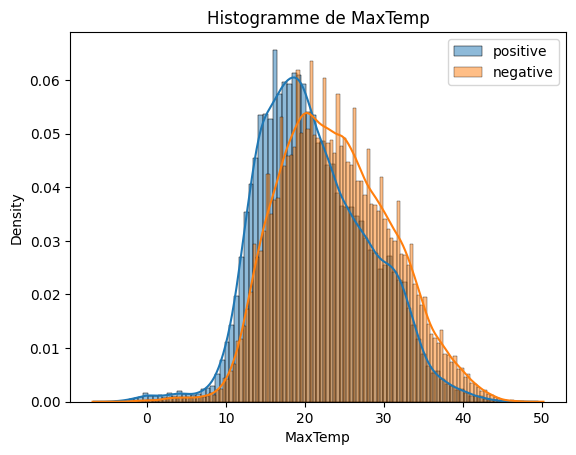

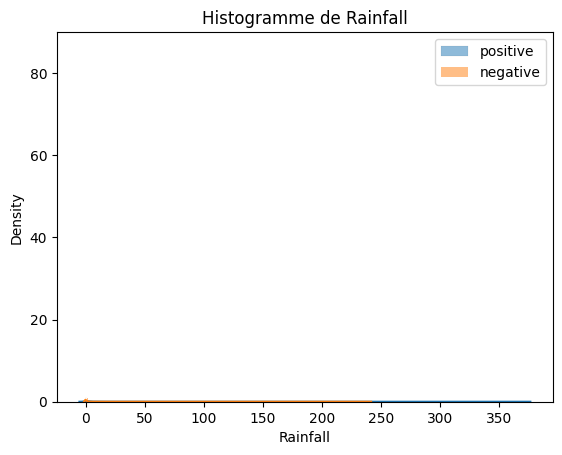

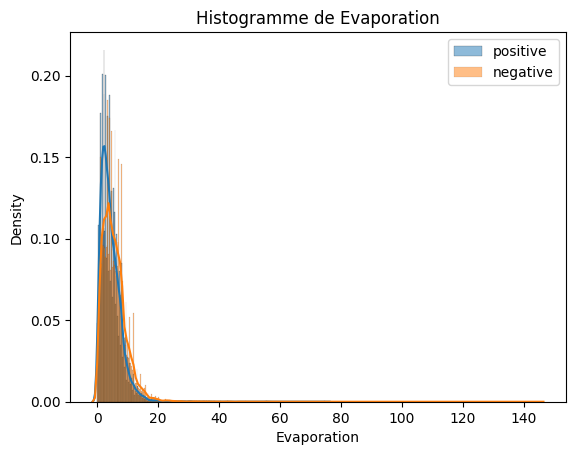

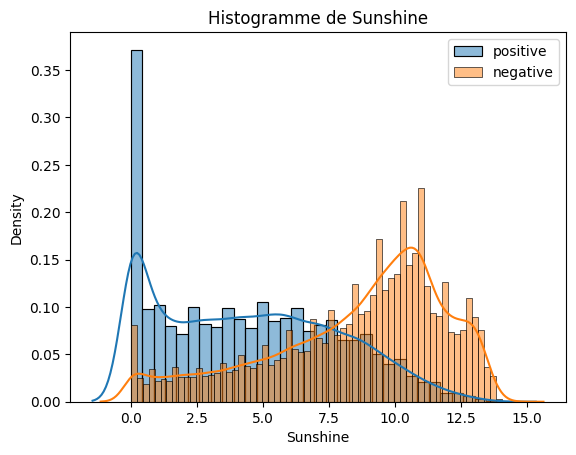

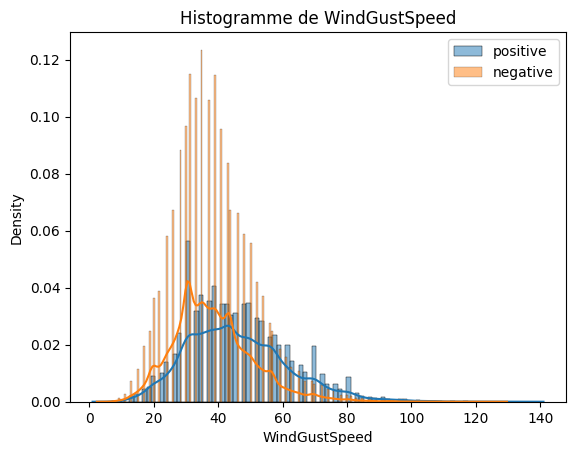

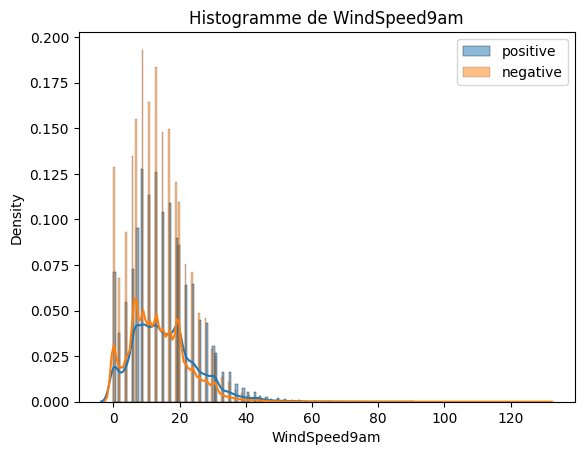

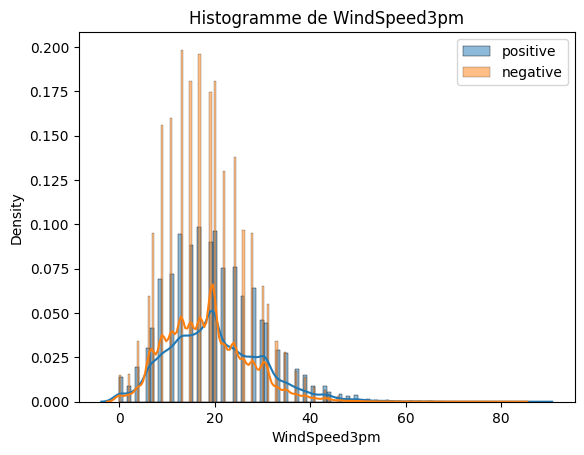

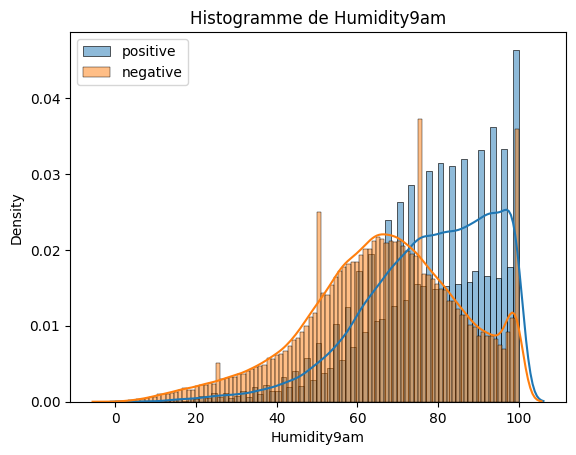

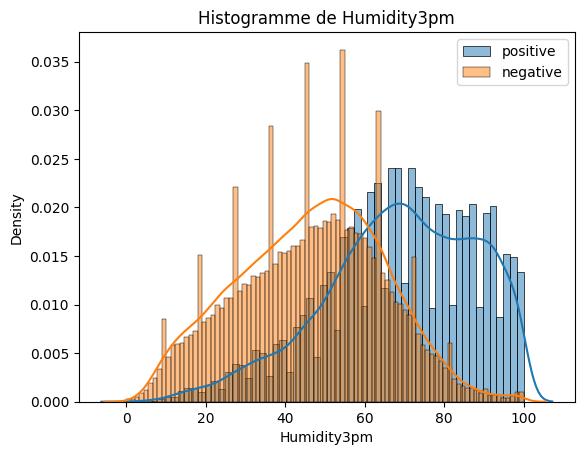

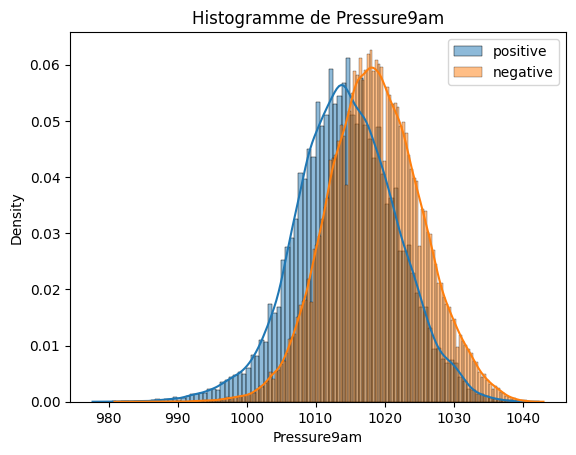

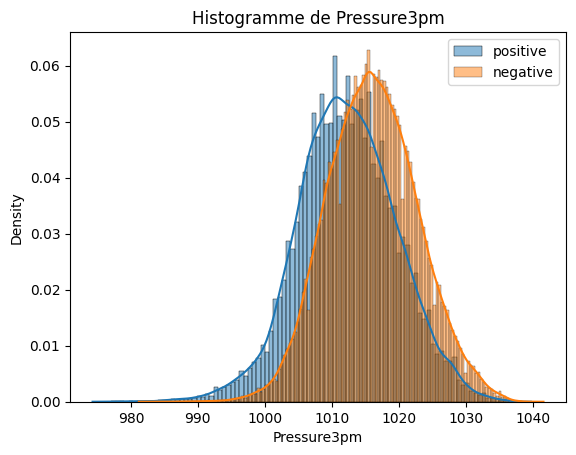

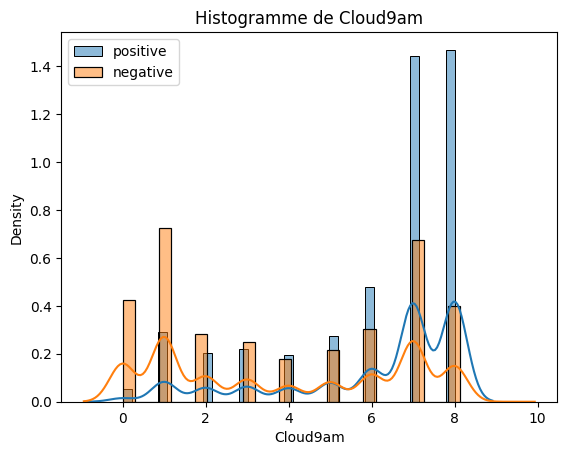

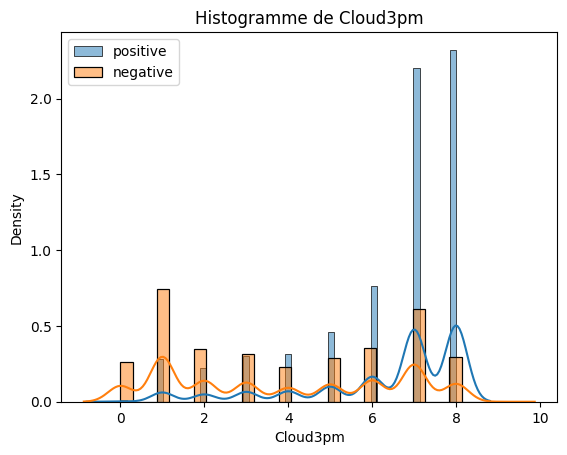

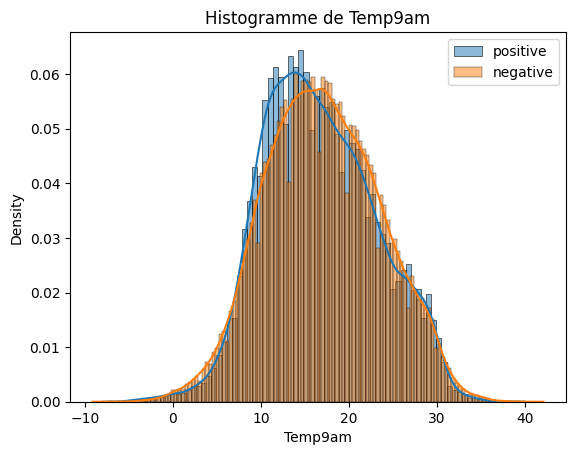

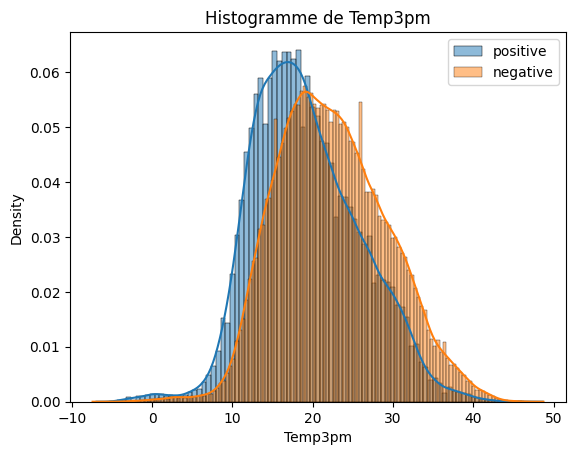

In [58]:
# Analyse des 2 cas:
for val in numerical_col:
        plt.figure()
        sns.histplot(weather_data[weather_data.RainTomorrow=="Yes"][val] , kde=True, stat="density", kde_kws=dict(cut=3),label="positive")
        sns.histplot(weather_data[weather_data.RainTomorrow=="No"][val], kde=True,stat="density", kde_kws=dict(cut=3),label="negative")
        plt.title(f"Histogramme de {val}")
        plt.legend()

##### Pour la pluspart des figures il n'y pas de différence lorsque RainTommorow est positive ou négative.On constate que les deux courbes sont souvent superposés .Toutefois on remarque une différence de l'évolution des courbes pour Humidité (9am et 3pm) de même pour la pression(3pm et 9am) les courbes ne sont pas vraiment supperposés Aussi pour le Sunshine. ce qui montre que ces derniers caractériques pourraient être importants pour la prédiction de RainTommorow.

<Axes: >

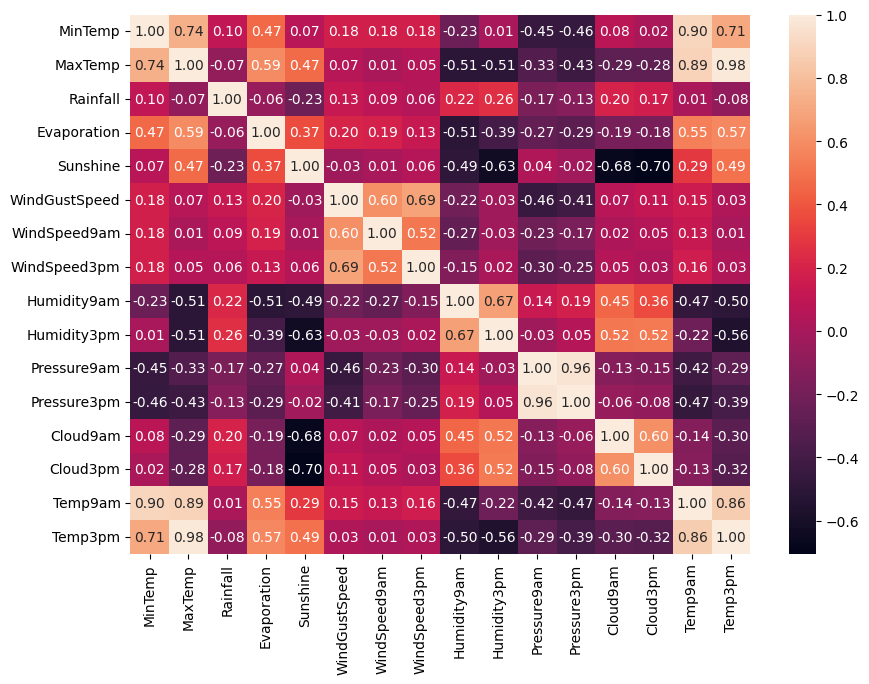

In [59]:
### corélation entre les valeurs des columns numérique:
plt.figure(figsize=(10,7))
sns.heatmap(weather_data[numerical_col].corr(),annot=True,fmt='.2f')

In [60]:
### Connaître le nombre de valeur unique pour chaque column
print(weather_data[categorical_col].nunique())

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64


<Axes: xlabel='RainTomorrow', ylabel='count'>

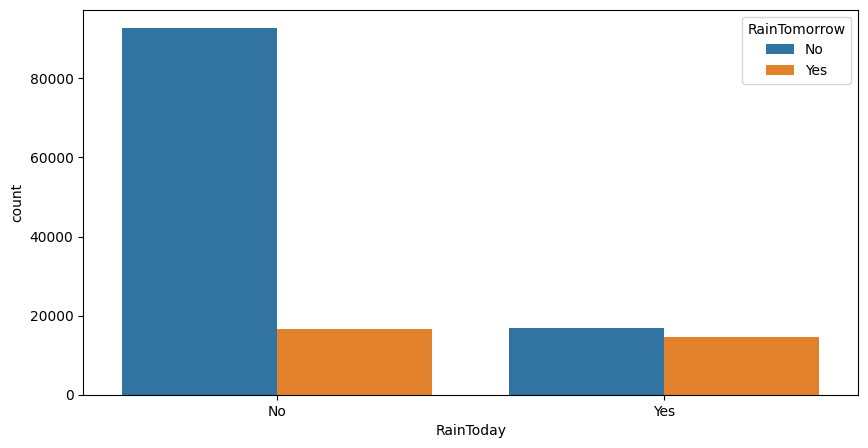

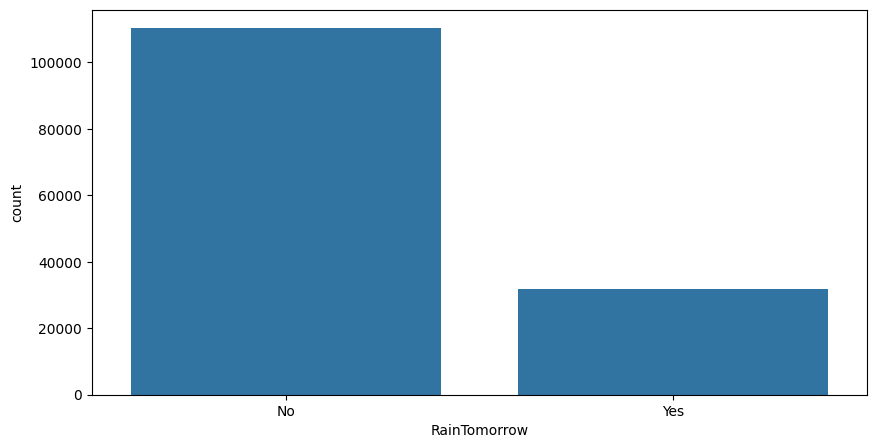

In [61]:

plt.figure(figsize=(10,5))
sns.countplot(x="RainToday",hue='RainTomorrow',data=weather_data)
plt.figure(figsize=(10,5))
sns.countplot(x="RainTomorrow",data=weather_data)

##### de la premiére figure on en déduire l'importance de RainToday sur Raintommorow.En effet on constate Que lorsqu'il n'a pas plu pour un jour la probabilité qu'il pleut le jour qui suit est assez faible .Toutefois lorsqu'il a plu  pour un jour il y a autant de chance qu'il pleut ou pas le jour suivant.

##### De la deuxiéme figure on voit que nos données ne sont pas équilibrés .donc pour évaluer nos modéles on va utiliser la precision le recall et la matrice de confusion.

In [62]:
weather_data.RainTomorrow.value_counts(normalize=True)

No     0.775819
Yes    0.224181
Name: RainTomorrow, dtype: float64

In [63]:
weather_data["year"]=pd.to_datetime(weather_data["Date"])
weather_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,2008-12-01
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,2008-12-02
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,2008-12-03
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,2008-12-04
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,2008-12-05


# Data Preprocessing

##### pour le pré-traitement des données on va utiliser l'approche suivant.Prémierement on va supprimer tous nos valeurs maquantes.créer des modéles comparer les différentes performances . Aussi avec les learning curves on va voir les modéles pour lesquels la performance pourrait s'améliorer en augmentant la quantité de données d'entrainement.

In [64]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer

In [65]:
def imputer(dataset):
    return dataset.dropna()
    #imputer_num = SimpleImputer(strategy='mean')
    #imputer_num= SimpleImputer(strategy='median')
    #dataset[numerical_col]= imputer.fit_transform(dataset[numerical_col])
    #return dataset

def encoder(dataset):
    encoder = OneHotEncoder(sparse_output=False)
    encoded_data = encoder.fit_transform(dataset[categorical_col])
    encoded_colonnes = list(encoder.get_feature_names_out(categorical_col))
    dataset[encoded_colonnes] = encoded_data
    return dataset,encoded_colonnes

def preprocessing(dataset):

    return encoder(imputer(dataset))


In [66]:
result=preprocessing(weather_data)
processed_data=result[0][["Date","year","RainTomorrow"]+numerical_col+result[1]]
processed_data.head()

,Date,year,RainTomorrow,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
6049,2009-01-01,2009-01-01,No,17.9,35.2,0.0,12.0,12.3,48.0,6.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6050,2009-01-02,2009-01-02,No,18.4,28.9,0.0,14.8,13.0,37.0,19.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6052,2009-01-04,2009-01-04,No,19.4,37.6,0.0,10.8,10.6,46.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6053,2009-01-05,2009-01-05,No,21.9,38.4,0.0,11.4,12.2,31.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
6054,2009-01-06,2009-01-06,No,24.2,41.0,0.0,11.2,8.4,35.0,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


# Appliquer des modéles de machine learning

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

##### Vu que nos données dépendent de la date on ne pourra pas utiliser le train-test-split de sklearn du fait que le choix des données s'effectuera aléatoirement ce qui risque de compromettre notre modéle .

In [68]:
def split(dataset):
    train=dataset[dataset["year"].dt.year<=2014]
    test=dataset[dataset["year"].dt.year>2014]
    return train.drop(["RainTomorrow","Date","year"],axis=1),test.drop(["RainTomorrow","Date","year"],axis=1),train["RainTomorrow"],test["RainTomorrow"]

In [69]:
X_train,X_test,y_train,y_test=split(processed_data)
print(f"X_train_shape:{X_train.shape},X_test_shape:{X_test.shape}")
print(f"y_train_shape:{y_train.shape},y_test_shape:{y_test.shape}")

X_train_shape:(43821, 92),X_test_shape:(12599, 92)
y_train_shape:(43821,),y_test_shape:(12599,)


In [70]:
models={
    "KNN":KNeighborsClassifier(),
    "random_forest":RandomForestClassifier(random_state=42),
    "decisiontree":DecisionTreeClassifier(random_state=42),
    "logistic_regression":LogisticRegression()
}

KNN
       No:0  Yes:1
No:0   9141    696
Yes:1  1407   1355
KNN
              precision    recall  f1-score   support

          No       0.87      0.93      0.90      9837
         Yes       0.66      0.49      0.56      2762

    accuracy                           0.83     12599
   macro avg       0.76      0.71      0.73     12599
weighted avg       0.82      0.83      0.82     12599

random_forest
       No:0  Yes:1
No:0   9445    392
Yes:1  1447   1315
random_forest
              precision    recall  f1-score   support

          No       0.87      0.96      0.91      9837
         Yes       0.77      0.48      0.59      2762

    accuracy                           0.85     12599
   macro avg       0.82      0.72      0.75     12599
weighted avg       0.85      0.85      0.84     12599

decisiontree
       No:0  Yes:1
No:0   8540   1297
Yes:1  1272   1490
decisiontree
              precision    recall  f1-score   support

          No       0.87      0.87      0.87      9837
    

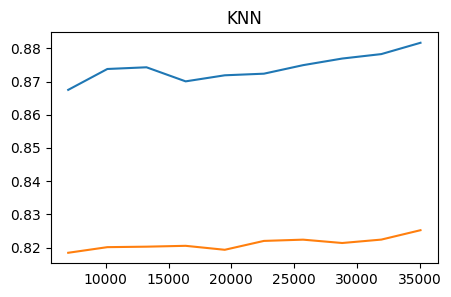

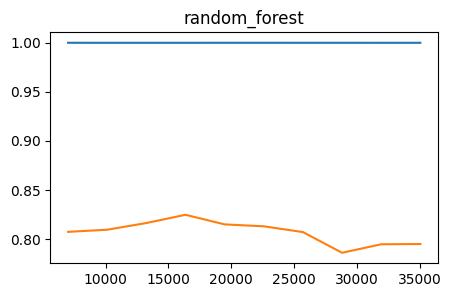

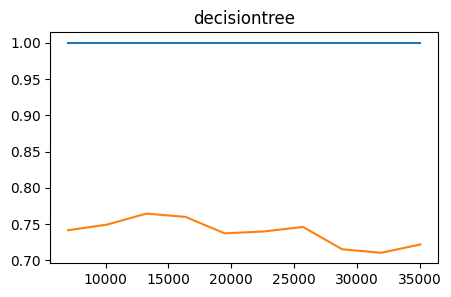

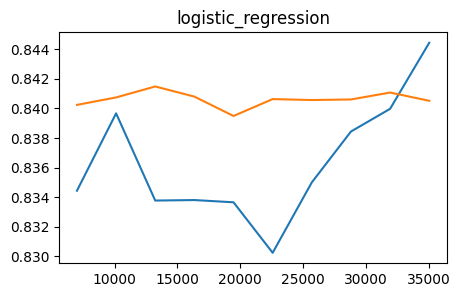

In [71]:
from sklearn.metrics import confusion_matrix, classification_report,make_scorer,f1_score
from sklearn.model_selection import learning_curve
f1_scorer = make_scorer(f1_score, average='weighted')
for key,model in models.items():

    plt.figure(figsize=(5,3))
    model.fit(X_train,y_train)

    if key=="KNN":
             test_pred = model.predict(X_test.values)
    else:
             test_pred = model.predict(X_test)
    confus_mat=pd.DataFrame(confusion_matrix(y_test,test_pred),columns=['No:0', 'Yes:1'], index=['No:0', 'Yes:1'])
    print(key)
    print(confus_mat)
    print(key)
    print(classification_report(y_test,test_pred))
    N, train_score, valid_score = learning_curve(model,X_train.values, y_train,scoring=f1_scorer
                                                 ,train_sizes=np.linspace(0.2, 1, 10), cv=5)
    plt.plot(N, train_score.mean(axis=1), label="train")
    plt.plot(N, valid_score.mean(axis=1), label="validation")
    plt.title(key)
    plt.plot()

# Interprétation des résultats

Les deux modéles avec les meilleures performances sont logisticregression et le randomforest avec un f1_score de 0.59.toutefois le Randomforest est
en overfitting et on constate via sa learning-curve que ces performances diminuent au fure et à mesure que l'on augmente la taille du training set et que le modéle est toujours en overfitting .ce qui est le contraire pour la logistic regression vu que ces performances augmententent et le modéles n'est plus en overfitting.Donc on retient pour le moment ces deux modéles on va essayer de voir ce qui se passe avec logistic lorsqu'on l'entraine sur des données plus volumineuse et on va améliorer le randomforest via gridseachcv.

Dans cette partie on va ajouter d'autre techniques de preprocessing telque le PolynomialFeatures qui permet souvent de mieux capter les caractétiques de
nos données. SelectKbest() pour un peu de feature selection.

In [72]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif

In [73]:
dataset=pd.read_csv("weatherAUS.csv")
dataset.dropna(subset="RainTomorrow", inplace= True)
dataset["year"]=pd.to_datetime(dataset["Date"])
dataset.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,2008-12-01
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,2008-12-02
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,2008-12-03
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,2008-12-04
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,2008-12-05


In [74]:
def imputer1(dataset):
    #return dataset.dropna()
    #imputer_num = SimpleImputer(strategy='mean')
    imputer_num= SimpleImputer(strategy='median')
    #imputer_cat=SimpleImputer(strategy="most frequent")
    dataset[numerical_col]= imputer_num.fit_transform(dataset[numerical_col])
    return dataset.dropna()

def encoder1(dataset):
    encoder = OneHotEncoder(sparse_output=False)
    encoded_data = encoder.fit_transform(dataset[categorical_col])
    encoded_colonnes = list(encoder.get_feature_names_out(categorical_col))
    dataset[encoded_colonnes] = encoded_data
    return dataset,encoded_colonnes

def preprocessing2(dataset):

    return encoder1(imputer1(dataset))


In [75]:
result1=preprocessing2(dataset)
preprocessed_data=result1[0][["Date","year","RainTomorrow"]+numerical_col+result1[1]]
preprocessed_data.head()

,Date,year,RainTomorrow,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
0,2008-12-01,2008-12-01,No,13.4,22.9,0.6,4.8,8.5,44.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,2008-12-02,2008-12-02,No,7.4,25.1,0.0,4.8,8.5,44.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,2008-12-03,2008-12-03,No,12.9,25.7,0.0,4.8,8.5,46.0,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,2008-12-04,2008-12-04,No,9.2,28.0,0.0,4.8,8.5,24.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2008-12-05,2008-12-05,No,17.5,32.3,1.0,4.8,8.5,41.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [76]:
X_train1,X_test1,y_train1,y_test1=split(preprocessed_data)
print(f"X_train_shape:{X_train.shape},X_test_shape:{X_test.shape}")
print(f"y_train_shape:{y_train.shape},y_test_shape:{y_test.shape}")

X_train_shape:(43821, 92),X_test_shape:(12599, 92)
y_train_shape:(43821,),y_test_shape:(12599,)


In [77]:
logistic=make_pipeline(LogisticRegression())

In [78]:
def evaluer(model,key,X_train,y_train,X_test,y_test):
    plt.figure(figsize=(5,3))
    model.fit(X_train,y_train)
    test_pred = model.predict(X_test)
    confus_mat=pd.DataFrame(confusion_matrix(y_test,test_pred),columns=['No:0', 'Yes:1'], index=['No:0', 'Yes:1'])
    print(key)
    print(confus_mat)
    print(key)
    print(classification_report(y_test,test_pred))
    N, train_score, valid_score = learning_curve(model,X_train, y_train,scoring=f1_scorer
                                                 ,train_sizes=np.linspace(0.2, 1, 10), cv=4)
    plt.plot(N, train_score.mean(axis=1), label="train")
    plt.plot(N, valid_score.mean(axis=1), label="validation")
    plt.title(key)
    plt.plot()

logisticRegression
        No:0  Yes:1
No:0   28420   1488
Yes:1   4568   3844
logisticRegression
              precision    recall  f1-score   support

          No       0.86      0.95      0.90     29908
         Yes       0.72      0.46      0.56      8412

    accuracy                           0.84     38320
   macro avg       0.79      0.70      0.73     38320
weighted avg       0.83      0.84      0.83     38320



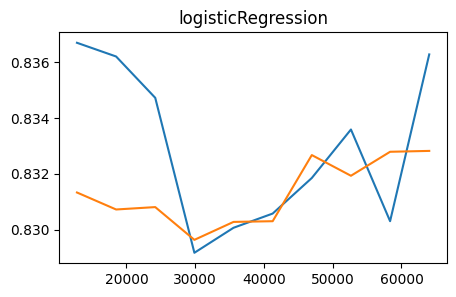

In [79]:
evaluer(logistic,"logisticRegression",X_train1,y_train1,X_test1,y_test1)

en remplacant les valeurs manquantes par la moyenne ou la médiane on obtient un f1-score plus faible que celui qu'on avait avec une quantité de données plus réduite.Toutefois on va continuer avec la logisticRegression vu que c'est elle qui généralise le mieux.

In [80]:
logistic=make_pipeline(PolynomialFeatures(2),SelectKBest(score_func=f_classif, k=10)
                           ,LogisticRegression())

In [81]:
models={
  "logisticRegression":logistic
}

logisticRegression
       No:0  Yes:1
No:0   9397    440
Yes:1  1498   1264
logisticRegression
              precision    recall  f1-score   support

          No       0.86      0.96      0.91      9837
         Yes       0.74      0.46      0.57      2762

    accuracy                           0.85     12599
   macro avg       0.80      0.71      0.74     12599
weighted avg       0.84      0.85      0.83     12599



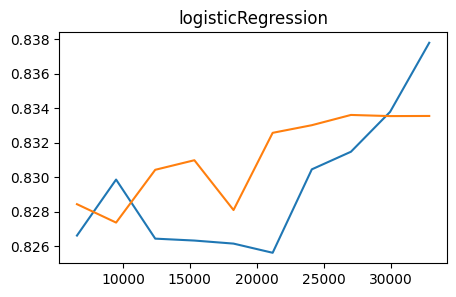

In [82]:
for key,model in models.items():
        evaluer(model,key,X_train,y_train,X_test,y_test)

# optimisation du modéle

In [107]:
param_grid = {
                  'selectkbest__k': range(22,30),
                  'logisticregression__penalty': ['none', 'l2'],
                  'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100]
             }


In [118]:

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import precision_recall_curve

grid=RandomizedSearchCV(models["logisticRegression"],param_grid,cv=5,scoring="f1",n_iter=40)
grid.fit(X_train,y_train)
print(grid.best_params_)
predicted=grid.predict(X_test)
print(classification_report(y_test, predicted))



{'selectkbest__k': 29, 'logisticregression__penalty': 'none', 'logisticregression__C': 0.01}
              precision    recall  f1-score   support

          No       0.86      0.95      0.90      9837
         Yes       0.72      0.47      0.57      2762

    accuracy                           0.84     12599
   macro avg       0.79      0.71      0.74     12599
weighted avg       0.83      0.84      0.83     12599



[]

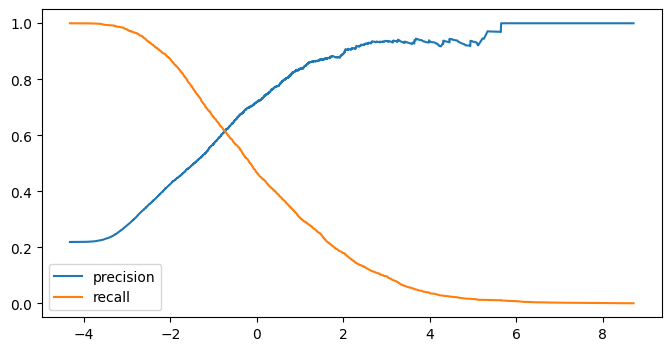

In [119]:
precision,recall,threesold=precision_recall_curve(y_test.map({"Yes":1,"No":0}),grid.best_estimator_.decision_function(X_test))
plt.figure(figsize=(8,4))
plt.plot(threesold,precision[:-1],label="precision")
plt.plot(threesold,recall[:-1],label="recall")
plt.legend()
plt.plot()


on peut maintenant en fonction du thresold choisir le modéle avec la precision et le recall qui convient.